In [1]:
#this is the DS6: Data question1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem? 
    
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
#Reading the gdp_per_capita.csv which is downloaaded fro the URL("") as .csv file and nested in the data folder
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head(10)
gdp_df.tail(5)

# there are 4 coulmns Country or Area, Year, Value, Value Footnotes. Value Footnotes has NaN values

,Country or Area,Year,Value,Value Footnotes
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,NaN,NaN,NaN,NaN
6869,footnoteSeqID,Footnote,NaN,NaN
6870,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [3]:
gdp_df.shape #(6871, 4)
gdp_df.info()
gdp_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 214.8+ KB


Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

1. There are 7871 rows and 4 colums

2. There are 4 coulmns Country or Area, Year, Value, Value Footnotes.
Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

2. The df has 6871 entries (rows of information)
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)

2. Value Footnotes has NaN values.
3. Yes there are NaN values in the country column and Year. The world Footnote in the Year column changes the Year column type to object, rather than keeping it to integer.



In [6]:
# droping the NaN values in the df columns country and value
gdp_df_dropnan = gdp_df.dropna(subset=['Country or Area', 'Value']) 
gdp_df_dropnan.shape
gdp_df_dropnan.tail(5)
gdp_df_dropnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 268.3+ KB


This gives us the df with 6868 rows and 4 columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 4 columns):
    Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 268.3+ KB

In [7]:
#Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'

gdp_df_dropnan_dropfootnotes = gdp_df_dropnan.drop(columns = ["Value Footnotes"])
print(gdp_df_dropnan_dropfootnotes.tail(5))
gdp_df_dropnan_dropfootnotes.columns

     Country or Area  Year        Value
6863        Zimbabwe  1994  3263.934978
6864        Zimbabwe  1993  3033.504852
6865        Zimbabwe  1992  3054.889178
6866        Zimbabwe  1991  3426.598094
6867        Zimbabwe  1990  3324.348171


Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [8]:
gdp_df_column_rename = gdp_df_dropnan_dropfootnotes.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'})
print(gdp_df_column_rename.head(5))
gdp_df_column_rename.info() # we can also use the df.dtype() to find the type.

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398
1  Afghanistan  2018     2033.779002
2  Afghanistan  2017     2058.383832
3  Afghanistan  2016     2057.062164
4  Afghanistan  2015     2068.265904
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   object 
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), object(2)
memory usage: 214.6+ KB


The Nan values are taken out, footnotes removed.
Now we have 6868 rows, and 3 columns, but the type is the object for country name and year. we want the year to be the int

In [9]:
#convert the type using the .astype() function for the column, and selecting it to be assinged back sort of saving it in the same dataframe to the same df
gdp_df_column_rename["Year"] = gdp_df_column_rename["Year"].astype(int)
gdp_df_column_rename.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int32  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 187.8+ KB


This CSV could have been read differently using the nrows function to drop the last row in the year column which has a string and converted it to an object column.

In [10]:
# Reread the .csv file into the dataframe without changing the datatype and droping the Footnotes row.
gdp_df_nrows = pd.read_csv("../data/gdp_per_capita.csv", nrows=6868)
gdp_df_nrows.info()
gdp_df_nrows.shape
gdp_df_nrows.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB


Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

We now have a df called gdp_df_nrows where there are 4 columns and 6868 rows. The datatype is object for country, int for year and float for GDP and footnotes
Now will drop the Footnotes coulmn and rename the coulmn header.

In [11]:
gdp_df_for_analysis = gdp_df_nrows.drop(columns = ["Value Footnotes"])
gdp_df_for_analysis = gdp_df_for_analysis.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df_for_analysis.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [12]:
gdp_df_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


 How many rows and columns does gdp_df have? 
     Rows = 6868 and Columns: 3
 What are the data types of its columns? 
     Country = Object
     Year = Int
     GDP_Per_Capita = float
         
If any of the columns are not the expected types, figure out why and fix it.
    Column type and value are fine.

Q7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [53]:
gdp_df_for_analysis['Year'].value_counts().sort_index(ascending=False)
#.sort_index() helps put the output in lowest to highest value using the index.
#.sort_index(ascending=False) puts from highest to lowest
#.plot(kind = 'bar')

2019    231
2018    237
2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

The data ranges from Year 1990 (207 observations) to 2019 (231) while 2013-2017 (238 OBSERVATIONS) with lowest values for 1990

Q8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [57]:
gdp_df_for_analysis['Country'].value_counts()
#gdp_df_for_analysis['Country'].value_counts().head(20)
gdp_df_for_analysis['Country'].value_counts().tail(20)
#gdp_df_for_analysis.head()

Croatia                      25
Moldova                      25
Kuwait                       25
Montenegro                   23
San Marino                   22
Libya                        21
Kosovo                       20
Other small states           20
Liberia                      20
Timor-Leste                  20
CuraÃ§ao                     20
Qatar                        20
Palau                        20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

In [64]:
gdp_df_for_analysis.loc[gdp_df_for_analysis['Country'] == "Djibouti"]

,Country,Year,GDP_Per_Capita
1477,Djibouti,2019,5534.749116
1478,Djibouti,2018,5214.088499
1479,Djibouti,2017,4885.220563
1480,Djibouti,2016,4709.549234
1481,Djibouti,2015,4488.827214
1482,Djibouti,2014,4238.996239
1483,Djibouti,2013,4028.446052


In [62]:
gdp_df_for_analysis.loc[gdp_df_for_analysis['Year'] == 1990].value_counts() #207 countries start the count since 1990

Country        Year  GDP_Per_Capita
Albania        1990  4842.734635       1
OECD members   1990  29442.103550      1
Namibia        1990  5851.955366       1
Nepal          1990  1409.069558       1
Netherlands    1990  36577.865850      1
                                      ..
Guinea         1990  1507.666054       1
Guinea-Bissau  1990  1994.669656       1
Guyana         1990  4843.072726       1
Haiti          1990  3229.618638       1
Zimbabwe       1990  3324.348171       1
Length: 207, dtype: int64

In [39]:
gdp_df_for_analysis.loc[gdp_df_for_analysis['Country'] == "Djibouti"]

,Country,Year,GDP_Per_Capita
1477,Djibouti,2019,5534.749116
1478,Djibouti,2018,5214.088499
1479,Djibouti,2017,4885.220563
1480,Djibouti,2016,4709.549234
1481,Djibouti,2015,4488.827214
1482,Djibouti,2014,4238.996239
1483,Djibouti,2013,4028.446052


There are total 238 countries in the dataset, with the lowest count represenation from Djibouti (7 observations), followed by Turks and Caicos Islands (9 observations). while for some countries like lebanon it has 30 rows. 
Djibouti did not start recording sensex until 2013. It was not an independent country untill 1977 and had to face civil unrest from 1990 to 2000. 

In [83]:
gdp_groupby_country = gdp_df_for_analysis.groupby('Country').value_counts().to_frame()
gdp_groupby_country.head(5)
#gdp_df_for_analysis.groupby(['Country'])['Country'].count()

0
Country     Year GDP_Per_Capita   
Afghanistan 2002 1189.784878     1
            2003 1235.810063     1
            2019 2065.036398     1
            2018 2033.779002     1
            2017 2058.383832     1

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [97]:
gdp_2014 = gdp_df_for_analysis.loc[gdp_df_for_analysis['Year'] == 2014]
gdp_2014 = gdp_2014.set_index('Year')
gdp_2014.head(20)

,Country,GDP_Per_Capita
Year,,
2014,Afghanistan,2102.385234
2014,Albania,11623.866680
2014,Algeria,11512.705410
2014,Angola,8239.828837
2014,Antigua and Barbuda,18104.241470
2014,Arab World,14219.562390
2014,Argentina,23550.099060
2014,Armenia,11019.838780
2014,Aruba,35458.608340


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 


In [99]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710347
std       20983.869621
min         822.610458
25%        4753.110935
50%       12209.385755
75%       26803.610475
max      156514.133800
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?


(array([52., 27., 14., 32., 21., 12.,  5., 11.,  9.,  4.,  6.,  6.,  4.,
         5.,  4.,  6.,  4.,  3.,  3.,  2.,  3.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.6104578 ,   3936.44092464,   7050.27139149,  10164.10185833,
         13277.93232518,  16391.76279202,  19505.59325886,  22619.42372571,
         25733.25419255,  28847.0846594 ,  31960.91512624,  35074.74559308,
         38188.57605993,  41302.40652677,  44416.23699362,  47530.06746046,
         50643.8979273 ,  53757.72839415,  56871.55886099,  59985.38932784,
         63099.21979468,  66213.05026152,  69326.88072837,  72440.71119521,
         75554.54166206,  78668.3721289 ,  81782.20259574,  84896.03306259,
         88009.86352943,  91123.69399628,  94237.52446312,  97351.35492996,
        100465.18539681, 103579.01586365, 106692.8463305 , 109806.67679734,
        112920.50726418, 116034.

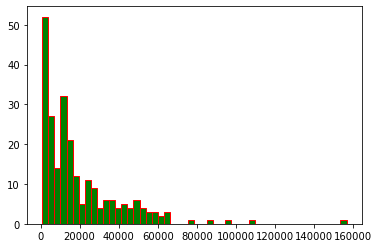

In [105]:
#plt.hist(gdp_2014['GDP_Per_Capita'])
plt.hist(gdp_2014['GDP_Per_Capita'], color="green", edgecolor="red", bins=50)

The shape of the histogram is right skwed. The max value is 155514 and min is 822.
(Width of each bin is = (max value of data – min value of data) / total number of bins)

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.


In [98]:
gdp_2014.sort_values('GDP_Per_Capita').head(5) 


,Country,GDP_Per_Capita
Year,,
2014,Central African Republic,822.610458
2014,Burundi,886.235777
2014,Malawi,1027.208496
2014,Dem. Rep. Congo,1029.790785
2014,Niger,1127.615541


In [93]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False).head(5) 

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.13380
3691,Luxembourg,2014,108760.91600
5138,Qatar,2014,95578.41697
5464,Singapore,2014,87808.66316
561,Bermuda,2014,77361.10488


#Countries with lowest GDP_Per_Capita in 2014 are Central African Republic, Burundi, Malawi, Dem. Rep. Congo and Niger

#Countries with the highest GDP_Per_Capita in 2014 are Macao SAR China, Luxembourg, Qatar, Singapore and Bermuda